In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from ast import literal_eval
from shapely.geometry import Polygon
CSV_PATH = "/home/zhimin90/CPT/CSVs/"

In [2]:
pd.reset_option("display.max_columns", 50)

In [3]:
pwd

'/home/zhimin90/CPT/HerokuCPT/modeling'

In [4]:
df = pd.read_csv(CSV_PATH + "2020-03-21_frames_all", index_col=0, converters={"poly_coordinate": literal_eval})

In [5]:
df.head(10)

,start_date,end_date,poly_coordinate,density
0,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97726, 41.60687], [-87.97676558558558, 4...",-7.368972e-17
1,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97676558558558, 41.60687], [-87.97627117...",-7.069238e-17
2,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97627117117118, 41.60687], [-87.97577675...",-7.553285e-17
3,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97577675675676, 41.60687], [-87.97528234...",-7.229394e-17
4,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97528234234234, 41.60687], [-87.97478792...",-7.495127e-17
5,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97478792792793, 41.60687], [-87.97429351...",-7.826177e-17
6,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97429351351352, 41.60687], [-87.97379909...",-7.910282e-17
7,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.9737990990991, 41.60687], [-87.973304684...",-7.401182e-17
8,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97330468468469, 41.60687], [-87.97281027...",-7.726861e-17
9,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97281027027027, 41.60687], [-87.97231585...",-7.477234e-17


In [10]:
max_density = max(df.density.astype(int))
min_density = min(df.density.astype(int))

print(max_density)
print(min_density)

277
-30


In [41]:
df["int_density"] = (df.density.astype(int)*50/(max_density - min_density)).astype(int)
df.head(10)


,start_date,end_date,poly_coordinate,density,int_density
0,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97726, 41.60687], [-87.97676558558558, 4...",-7.368972e-17,0
1,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97676558558558, 41.60687], [-87.97627117...",-7.069238e-17,0
2,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97627117117118, 41.60687], [-87.97577675...",-7.553285e-17,0
3,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97577675675676, 41.60687], [-87.97528234...",-7.229394e-17,0
4,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97528234234234, 41.60687], [-87.97478792...",-7.495127e-17,0
5,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97478792792793, 41.60687], [-87.97429351...",-7.826177e-17,0
6,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97429351351352, 41.60687], [-87.97379909...",-7.910282e-17,0
7,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.9737990990991, 41.60687], [-87.973304684...",-7.401182e-17,0
8,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97330468468469, 41.60687], [-87.97281027...",-7.726861e-17,0
9,2020-02-25 15:26:27,2020-03-26 15:07:10,"[[-87.97281027027027, 41.60687], [-87.97231585...",-7.477234e-17,0


In [42]:
max(df["int_density"])

45

In [43]:
type(df.iloc[0,2])

list

In [44]:
list = []
for index, row in df.iterrows():
    list.append( [row['start_date'],  row['end_date'],Polygon( row['poly_coordinate']), row['density'], row['int_density']] )

In [160]:
print(list[0][2])


POLYGON ((-87.97726 41.60687, -87.97676558558558 41.60687, -87.97676558558558 41.60732441441441, -87.97726 41.60732441441441, -87.97726 41.60687))
-7.368972235897639e-17


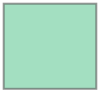

In [169]:
list[1][2]

MULTIPOLYGON (((-87.97726 41.60687, -87.97676558558558 41.60687, -87.97676558558558 41.60732441441441, -87.97726 41.60732441441441, -87.97726 41.60687)), ((-87.97627117117118 41.60687, -87.97577675675676 41.60687, -87.97577675675676 41.60732441441441, -87.97627117117118 41.60732441441441, -87.97627117117118 41.60687)))


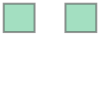

In [191]:
import shapely

print(shapely.ops.unary_union([list[0][2],list[2][2]]))
shapely.ops.unary_union([list[0][2],list[2][2]])

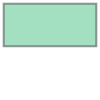

In [171]:
list[0][2].union(list[1][2]).convex_hull

In [172]:
print(list[0][2].union(list[1][2]))
print(list[0][2].union(list[1][2]).convex_hull)

POLYGON ((-87.97676558558558 41.60687, -87.97726 41.60687, -87.97726 41.60732441441441, -87.97676558558558 41.60732441441441, -87.97627117117116 41.60732441441441, -87.97627117117116 41.60687, -87.97676558558558 41.60687))
POLYGON ((-87.97726 41.60687, -87.97726 41.60732441441441, -87.97627117117116 41.60732441441441, -87.97627117117116 41.60687, -87.97726 41.60687))


In [46]:
gdf = gpd.GeoDataFrame(list, columns =['start_date','end_date', 'geometry', 'density', 'int_density'])

In [47]:
gdf.bounds

,minx,miny,maxx,maxy
0,-87.977260,41.60687,-87.976766,41.607324
1,-87.976766,41.60687,-87.976271,41.607324
2,-87.976271,41.60687,-87.975777,41.607324
3,-87.975777,41.60687,-87.975282,41.607324
4,-87.975282,41.60687,-87.974788,41.607324
...,...,...,...,...
999995,-87.485318,42.06083,-87.484823,42.061284
999996,-87.484823,42.06083,-87.484329,42.061284
999997,-87.484329,42.06083,-87.483834,42.061284
999998,-87.483834,42.06083,-87.483340,42.061284


In [48]:
gdf.total_bounds

array([-87.97726   ,  41.60687   , -87.48284559,  42.06128441])

In [118]:
xmin, ymin, xmax, ymax = (-87.97726, 41.60687, -87.48334, 42.06083)

In [49]:
#xmin, ymin, xmax, ymax = gdf.total_bounds

In [119]:
grid_size = 10
xgrid = np.arange(xmin, xmax, (xmax-xmin)/grid_size)
ygrid = np.arange(ymin, ymax, (ymax-ymin)/grid_size)

In [120]:
print(xgrid,ygrid)

[-87.97726  -87.927868 -87.878476 -87.829084 -87.779692 -87.7303
 -87.680908 -87.631516 -87.582124 -87.532732] [41.60687  41.652266 41.697662 41.743058 41.788454 41.83385  41.879246
 41.924642 41.970038 42.015434]


In [121]:
c = 0
gdf["zone"] = None
for row in xgrid:
    for col in ygrid:
        boundbox = Polygon([[row,col],[row+(xmax-xmin)/grid_size,col],[row+(xmax-xmin)/grid_size,col+(ymax-ymin)/grid_size],[row,col+(ymax-ymin)/grid_size],[row,col]])
        bb_df = gpd.GeoSeries(boundbox)
        bool_within_bb = gdf.geometry.intersects(boundbox)
        index_within_bb = gdf[bool_within_bb].index
        gdf.iloc[index_within_bb,5] = c
        c+=1
        print(c)
        print("count rows within count" + str(len(index_within_bb)))
        print("-"*25)

1
count rows within count10000
-------------------------
2
count rows within count10100
-------------------------
3
count rows within count10100
-------------------------
4
count rows within count10100
-------------------------
5
count rows within count10100
-------------------------
6
count rows within count10100
-------------------------
7
count rows within count10100
-------------------------
8
count rows within count10100
-------------------------
9
count rows within count10100
-------------------------
10
count rows within count10000
-------------------------
11
count rows within count10100
-------------------------
12
count rows within count10201
-------------------------
13
count rows within count10201
-------------------------
14
count rows within count10201
-------------------------
15
count rows within count10201
-------------------------
16
count rows within count10201
-------------------------
17
count rows within count10201
-------------------------
18
count rows within co

In [53]:
gdf["zone"].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Name: zone, Length: 1000000, dtype: bool

In [54]:
gdf[gdf["zone"].isnull()].count()

start_date     0
end_date       0
geometry       0
density        0
int_density    0
zone           0
dtype: int64

In [55]:
#c = 0
#gdf["zone"] = None
#for row in xgrid:
#    for col in ygrid:
#        #print(row,col)
#        current_index = gdf.cx[row:row+(xmax-xmin)/grid_size, col:col+(ymax-ymin)/grid_size].index
#        gdf.iloc[current_index,5] = c
#        c+=1

In [56]:
sum(gdf["zone"].notna())

1000000

In [192]:
gdf[gdf["zone"].notna()]

,start_date,end_date,geometry,density,int_density,zone
0,2020-02-25 15:26:27,2020-03-26 15:07:10,"POLYGON ((-87.97726 41.60687, -87.97677 41.606...",-7.368972e-17,0,0
1,2020-02-25 15:26:27,2020-03-26 15:07:10,"POLYGON ((-87.97677 41.60687, -87.97627 41.606...",-7.069238e-17,0,0
2,2020-02-25 15:26:27,2020-03-26 15:07:10,"POLYGON ((-87.97627 41.60687, -87.97578 41.606...",-7.553285e-17,0,0
3,2020-02-25 15:26:27,2020-03-26 15:07:10,"POLYGON ((-87.97578 41.60687, -87.97528 41.606...",-7.229394e-17,0,0
4,2020-02-25 15:26:27,2020-03-26 15:07:10,"POLYGON ((-87.97528 41.60687, -87.97479 41.606...",-7.495127e-17,0,0
...,...,...,...,...,...,...
998994,2020-02-25 15:26:27,2020-03-26 15:07:10,"POLYGON ((-87.48581 42.06038, -87.48532 42.060...",7.646518e-16,0,99
998995,2020-02-25 15:26:27,2020-03-26 15:07:10,"POLYGON ((-87.48532 42.06038, -87.48482 42.060...",7.625192e-16,0,99
998996,2020-02-25 15:26:27,2020-03-26 15:07:10,"POLYGON ((-87.48482 42.06038, -87.48433 42.060...",7.614925e-16,0,99
998997,2020-02-25 15:26:27,2020-03-26 15:07:10,"POLYGON ((-87.48433 42.06038, -87.48383 42.060...",7.631624e-16,0,99


In [193]:
gdf_dissolved = gdf.dissolve(by=['int_density','zone'])

In [194]:
gdf_dissolved

geometry  \
int_density zone                                                      
-4          67    POLYGON ((-87.64155 41.96813, -87.64205 41.968...   
-3          67    MULTIPOLYGON (((-87.64205 41.96722, -87.64205 ...   
-2          58    POLYGON ((-87.72363 41.97722, -87.72313 41.977...   
            63    MULTIPOLYGON (((-87.64254 41.74547, -87.64304 ...   
            67    MULTIPOLYGON (((-87.64155 41.96177, -87.64205 ...   
...                                                             ...   
 39         53    MULTIPOLYGON (((-87.72264 41.74592, -87.72264 ...   
 40         53    POLYGON ((-87.72264 41.74683, -87.72214 41.746...   
 41         53    MULTIPOLYGON (((-87.72214 41.74547, -87.72165 ...   
 43         53    MULTIPOLYGON (((-87.72214 41.74592, -87.72165 ...   
 45         53    POLYGON ((-87.72214 41.74638, -87.72165 41.746...   

                           start_date             end_date     density  
int_density zone                                                        
-4          67    2020-02-25 15:26:27  2020-03-26 15:07:10  -30.081804  
-3          67    2020-02-25 15:26:27  2020-03-26 15:07:10  -19.263462  
-2          58    2020-02-25 15:26:27  2020-03-26 15:07:10  -13.831268  
            63    2020-02-25 15:26:27  2020-03-26 15:07:10  -14.530622  
            67    2020-02-25 15:26:27  2020-03-26 15:07:10  -13.379703  
...                               ...                  ...         ...  
 39         53    2020-02-25 15:26:27  2020-03-26 15:07:10  243.392242  
 40         53    2020-02-25 15:26:27  2020-03-26 15:07:10  248.199371  
 41         53    2020-02-25 15:26:27  2020-03-26 15:07:10  252.343231  
 43         53    2020-02-25 15:26:27  2020-03-26 15:07:10  265.838867  
 45         53    2020-02-25 15:26:27  2020-03-26 15:07:10  277.642700  

[376 rows x 4 columns]

In [217]:
gdf_dissolved['geometry'] = gdf_dissolved['geometry'].simplify(0)

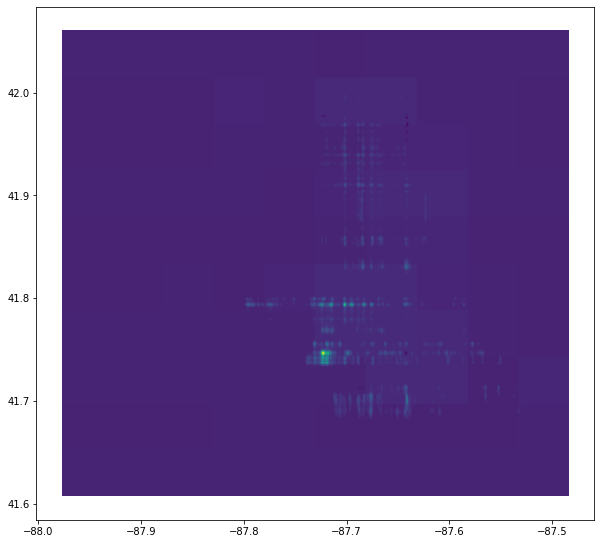

In [219]:
gdf_dissolved[["geometry","density"]].plot(column='density',figsize=(10,10))

In [221]:
import dill
f = open(CSV_PATH +'gdf_dissolved_2020.pkl', "wb")
dill.dump(gdf_dissolved, file=f)
f.close()

In [ ]:
gdf_dissolved.to_file("2017-11-11_4_test.geojson", driver='GeoJSON')